In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('../data/train_ctrUa4K.csv')
test = pd.read_csv('../data/test_lAUu6dG.csv')
train_original = train.copy()
test_original = test.copy()

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [5]:
train.shape, test.shape

((614, 13), (367, 12))

In [6]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 no

(None, None)

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Visualize Target Variable

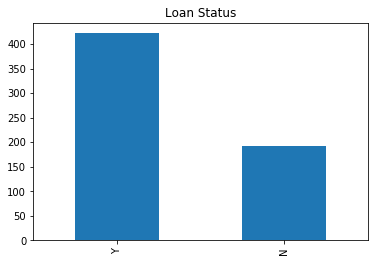

In [10]:
train['Loan_Status'].value_counts().plot.bar(title="Loan Status")

### Visualize Categorical Features

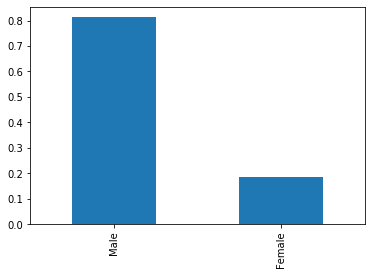

In [11]:
train['Gender'].value_counts(normalize=True).plot.bar()

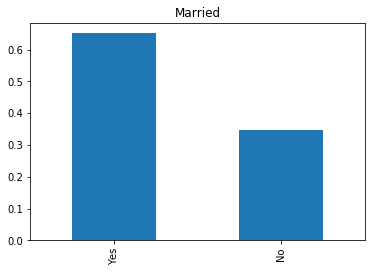

In [12]:
train['Married'].value_counts(normalize=True).plot.bar(title="Married") 

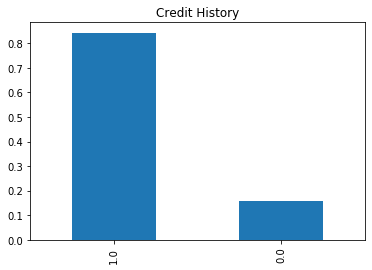

In [13]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History') 


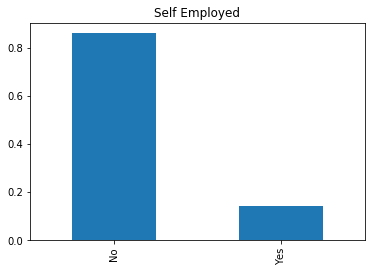

In [14]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')

### Visualize Ordinal Features

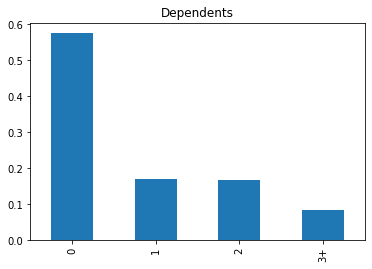

In [15]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

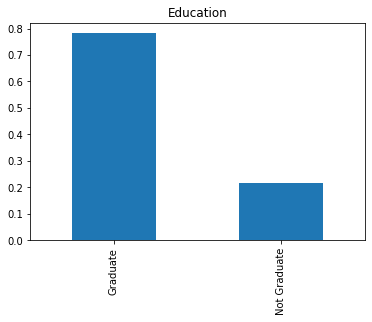

In [16]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

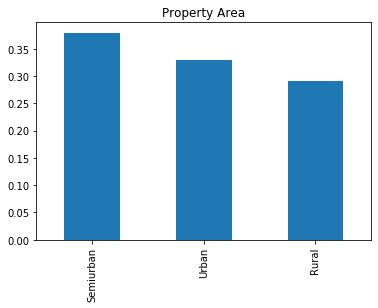

In [17]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

### Visualize Numerical Features

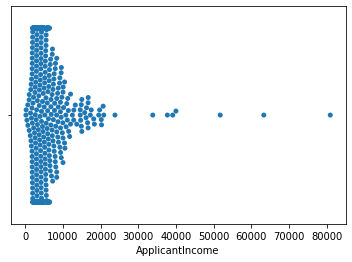

In [18]:
sns.swarmplot(train['ApplicantIncome'])

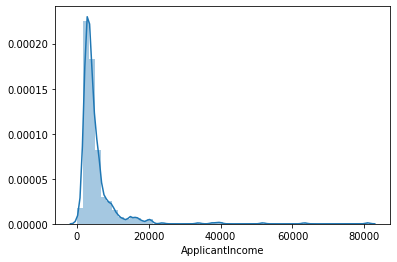

In [19]:
sns.distplot(train['ApplicantIncome'])   #checking distribution of applicants income, its left-skewed distribution

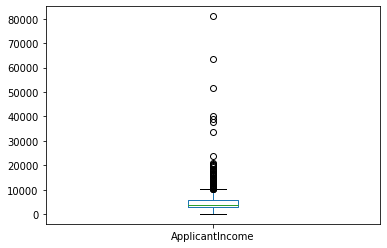

In [20]:
train['ApplicantIncome'].plot.box()
plt.show()

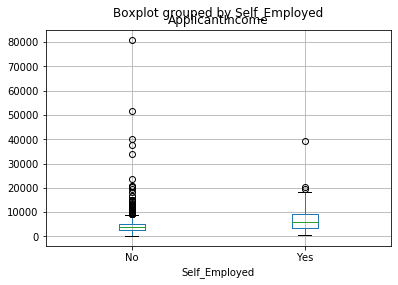

In [21]:
train.boxplot('ApplicantIncome', by = "Self_Employed")
plt.show()

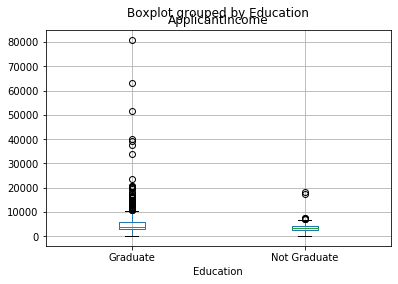

In [22]:
train.boxplot('ApplicantIncome', by = "Education")
plt.show()

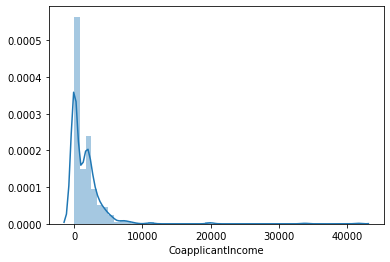

In [23]:
sns.distplot(train['CoapplicantIncome'])

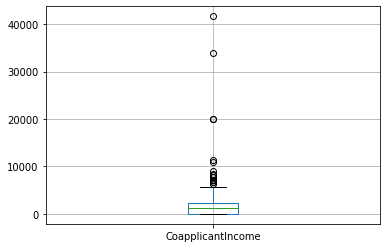

In [24]:
train.boxplot("CoapplicantIncome")

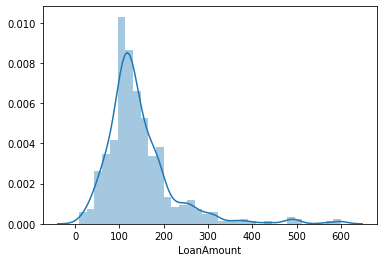

In [25]:
train_valid = train.dropna()   #create a dataframe with no null values
sns.distplot(train_valid['LoanAmount'])

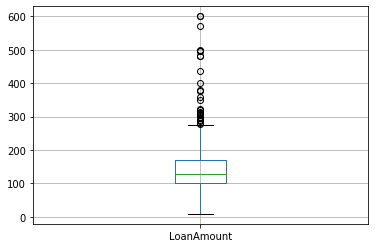

In [26]:
train_valid.boxplot("LoanAmount")

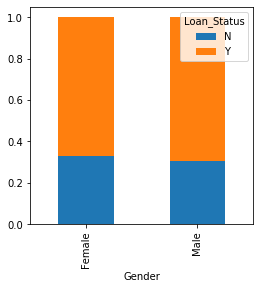

In [27]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [28]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [29]:
Gender.sum(1)  #Sum of row axis
Gender.sum(0)   #Sum of column axis

Loan_Status
N    187
Y    414
dtype: int64

In [30]:
Gender.div(Gender.sum(1), axis=0) #Divide the crosstab of Gender and Loan Status, i.e Gender, by the sum of its row axis

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


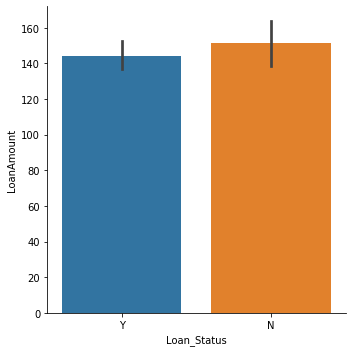

In [31]:
sns.catplot(x='Loan_Status', y='LoanAmount', kind='bar', data=train)

In [32]:
train.isnull().sum(),  test.isnull().sum()

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64, Loan_ID               0
 Gender               11
 Married               0
 Dependents           10
 Education             0
 Self_Employed        23
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            5
 Loan_Amount_Term      6
 Credit_History       29
 Property_Area         0
 dtype: int64)

In [33]:
train.shape

(614, 13)

In [34]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [35]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0], inplace=True)
train.LoanAmount.fillna(train.LoanAmount.median(), inplace=True)


In [37]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [39]:
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0], inplace=True)
test.LoanAmount.fillna(test.LoanAmount.median(), inplace=True)

In [40]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

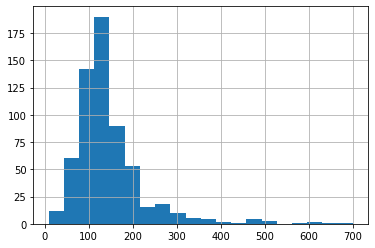

In [41]:
train['LoanAmount'].hist(bins=20)

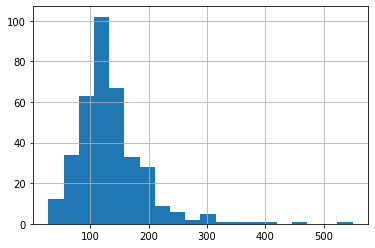

In [42]:
test['LoanAmount'].hist(bins=20)

In [43]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

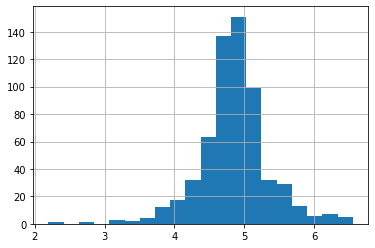

In [44]:
train['LoanAmount_log'].hist(bins=20)

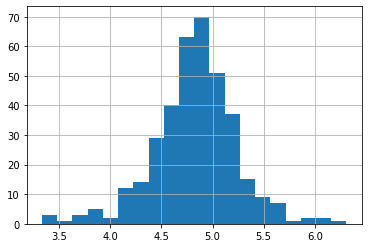

In [45]:
test['LoanAmount_log'].hist(bins=20)

## Evaluating Model's Performance

In [46]:
#drop LoanID column as it has no effect on the model's performance
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)



In [47]:
#create a new variable for our target column
X = train.drop('Loan_Status',1) 
y = train.Loan_Status
X.head()
X.shape

(614, 12)

In [48]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
# train.head()
# X.head()
X.shape
# test.head()

(614, 21)

In [49]:
#split train set into train and validation
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [50]:
#Building a model using LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, \
                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, \
                   penalty='l2', random_state=1, solver='liblinear', tol=0.0001,  \
                   verbose=0, warm_start=False)
pred_cv = lr_model.predict(x_cv)

In [51]:
#Accuracy score
accuracy_score(y_cv, pred_cv)

0.8378378378378378

In [52]:
pred_test = lr_model.predict(test)

In [53]:
sample_sub = pd.read_csv('../data/sample_submission_49d68Cx.csv')
sample_sub.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [54]:
sample_sub['Loan_Status'] = pred_test
sample_sub['Loan_ID'] = test_original['Loan_ID'] # a copy of the original test csv in dataframe format
sample_sub['Loan_Status'].replace(0, 'No', inplace=True)
sample_sub['Loan_Status'].replace(1, 'Yes', inplace=True)

In [55]:
sample_sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [56]:
#convert sample submission to a csv format
pd.DataFrame(sample_sub, columns=['Loan_ID', 'Loan_Status']).to_csv('../results/loan_results.csv', index=False)


## Decode the OneHotEncoder transformation

In [57]:
from sklearn import preprocessing
ohc = preprocessing.OneHotEncoder()  # all default params
# out = ohc.fit_transform(np.array(y).reshape(-1, 1))

In [58]:
# recovered_X = np.array([ohc.active_features_[col] for col in out.sorted_indices().indices]) \
#                 .reshape(614,2) - ohc.feature_indices_[:-1]

## Output model result into a pickle file, to be used as an API

In [59]:
#export result into a pickle file
import joblib
joblib.dump(lr_model, open('../results/model.pkl', 'wb'))

In [60]:
model = joblib.load(open('../results/model.pkl', 'rb'))
print(model.predict([[4, 300, 500, 34,24,45,23,12,54, 24,56,78,765,352,12, 45,66,56,23,23,21]]))

['Y']


# Logistic Regression using stratified k-folds cross validation

In [61]:
from sklearn.model_selection  import StratifiedKFold 

In [62]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('%d of kfold %d' % (i, kf.n_splits))
    x_train = X.loc[train_index]
    x_val = X.loc[test_index]
    y_train = y.loc[train_index]
    y_val = y.loc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(x_train, y_train)
    predict_test = model.predict(x_val)
    score = accuracy_score(y_val, predict_test)
    print('accuracy_score = ', score)
    i+=1
print(y_val)

1 of kfold 5
accuracy_score =  0.8064516129032258
2 of kfold 5
accuracy_score =  0.8064516129032258
3 of kfold 5
accuracy_score =  0.8114754098360656
4 of kfold 5
accuracy_score =  0.7950819672131147
5 of kfold 5
accuracy_score =  0.8360655737704918
7      N
11     Y
22     N
23     N
41     Y
45     Y
50     Y
51     Y
54     N
62     N
65     N
72     Y
76     N
81     Y
85     Y
88     Y
90     Y
99     Y
108    N
119    Y
123    Y
124    Y
126    Y
127    Y
141    Y
146    Y
147    Y
153    N
156    Y
159    Y
      ..
429    Y
434    Y
436    Y
447    N
449    N
450    N
451    Y
452    N
457    N
464    N
465    Y
469    N
472    Y
474    Y
480    Y
507    N
510    N
523    Y
530    Y
546    N
563    Y
573    N
577    Y
579    Y
580    Y
582    Y
597    N
604    Y
607    Y
609    Y
Name: Loan_Status, Length: 122, dtype: object


In [63]:
predict_test = model.predict(test) 
pred=model.predict_proba(x_val)[:,1]
pred


array([0.23313365, 0.8179072 , 0.25719175, 0.13244285, 0.73451799,
       0.68788677, 0.86229432, 0.82190374, 0.08723966, 0.14105194,
       0.86417237, 0.87475918, 0.63848967, 0.85598799, 0.82340971,
       0.6913653 , 0.88894937, 0.88459478, 0.14606733, 0.64453327,
       0.92233572, 0.70633344, 0.72071639, 0.65380773, 0.69700474,
       0.83689868, 0.77894054, 0.77399805, 0.70072358, 0.85709843,
       0.88500963, 0.74658456, 0.1257147 , 0.64300324, 0.87719647,
       0.84718677, 0.6181164 , 0.9004317 , 0.8444589 , 0.75483583,
       0.89505754, 0.37559855, 0.9056271 , 0.63863603, 0.85711632,
       0.60089508, 0.85113505, 0.76654744, 0.86247052, 0.83975518,
       0.81234357, 0.21404593, 0.82581253, 0.8711475 , 0.62456627,
       0.73275876, 0.87642857, 0.6888204 , 0.76594146, 0.88076739,
       0.63388228, 0.66332132, 0.76223086, 0.83295573, 0.91643749,
       0.59449831, 0.06298866, 0.69839023, 0.60837959, 0.85140439,
       0.73164637, 0.88769429, 0.78913474, 0.83947919, 0.78094

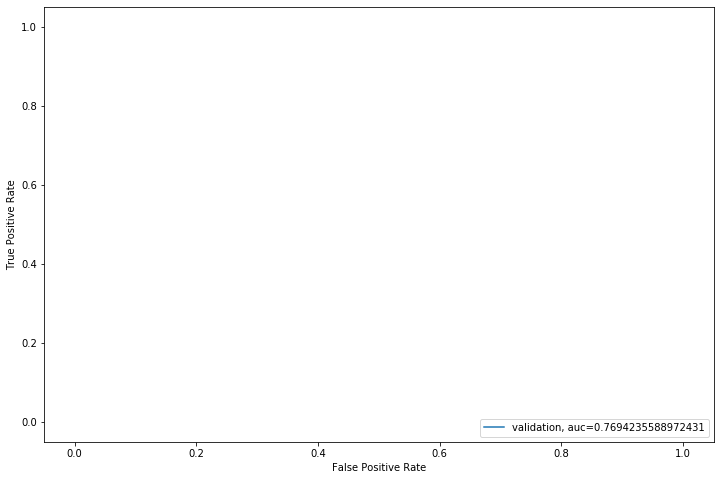

In [64]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_val,  pred, pos_label=1) #false positive rate & true positive rate
auc = metrics.roc_auc_score(y_val, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [65]:
sample_sub['Loan_Status']=predict_test 
sample_sub['Loan_ID'] = test_original['Loan_ID'] # a copy of the original test csv in dataframe format
sample_sub['Loan_Status'].replace(0, 'N', inplace=True)
sample_sub['Loan_Status'].replace(1, 'Y', inplace=True)

In [66]:
pd.DataFrame(sample_sub, columns=['Loan_ID','Loan_Status']).to_csv('../results/kfold_results.csv', index=False)

## Feature Engineering, creating new features

In [67]:
#create a column Total_Income that combines the Applicant Income and Coapplicant Income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

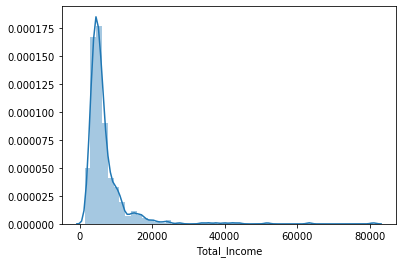

In [68]:
sns.distplot(train['Total_Income'])

We can see that the above is left-skewed, not a normal distribution. In order to make it better, I will take the log of the values

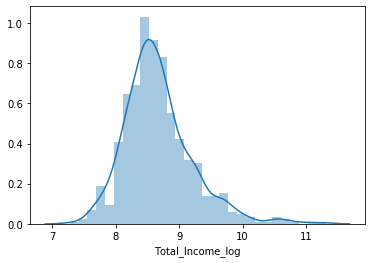

In [69]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

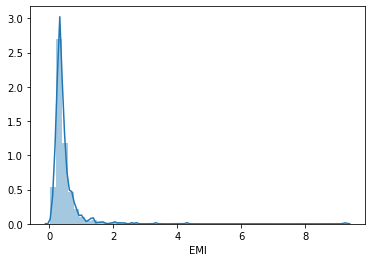

In [70]:
#create a column EMI that outputs the monthly loan amount to be paid by an applicant
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI']) #check EMI distribution

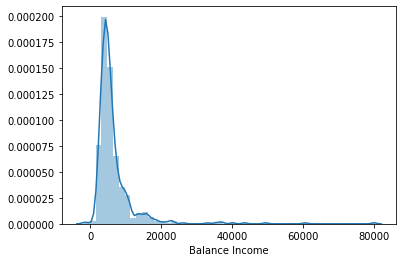

In [71]:
#create column, Balance Income, that shows the income remaining after paying the EMI
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [72]:
#Drop variables used to create the above new variables in order to reduce noise from the whole dataset
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)